In [1]:
import pandas as pd
import datetime

In [2]:
intraday = pd.DataFrame(columns=['date', 'price'])

In [3]:
with open("additional_data/4_aapl.txt", "r") as stock:
    for line in stock:
        el = line.split(" ")[0]+" "+ line.split(" ")[1]
        data = datetime.datetime.strptime(line.split(" ")[0]+" "+ line.split(" ")[1], '%Y-%m-%d %H:%M:%S')
        intraday = intraday.append({'date': data, 'price': float(line.split(" ")[-1].strip())}, ignore_index=True)

In [4]:
intraday.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


period_df = intraday#[(intraday['date'] > '2016-02-01') & (intraday['date'] < '2016-03-01')]

plt.plot(period_df['date'], period_df['price'].astype(float))
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [6]:
period_df.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


In [7]:
daily = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])

d = intraday['date'].values[0]


cur_day = pd.to_datetime(d).date().day
prices = list()
for idx, el in enumerate(intraday['date'].values):
    if pd.to_datetime(el).date().day == cur_day:
        prices.append(intraday['price'].values[idx])
    else:
        daily = daily.append({'date': pd.to_datetime(intraday['date'].values[idx-1]).date(), 'open': prices[0], 'high': max(prices), 'low': min(prices), 'close': prices[-1]}, ignore_index=True)
        prices = list()
        prices.append(intraday['price'].values[idx])
        cur_day = pd.to_datetime(el).date().day

In [8]:
daily.head()

,date,open,high,low,close
0,2016-01-04,100.0210,102.6220,99.8168,102.1300
1,2016-01-05,102.0840,102.1540,99.7876,100.0120
2,2016-01-06,98.3461,99.6902,97.4120,97.8785
3,2016-01-07,95.9694,97.4889,94.0896,94.6545
4,2016-01-08,95.2097,96.5120,94.2844,94.6253


Populating the interactive namespace from numpy and matplotlib


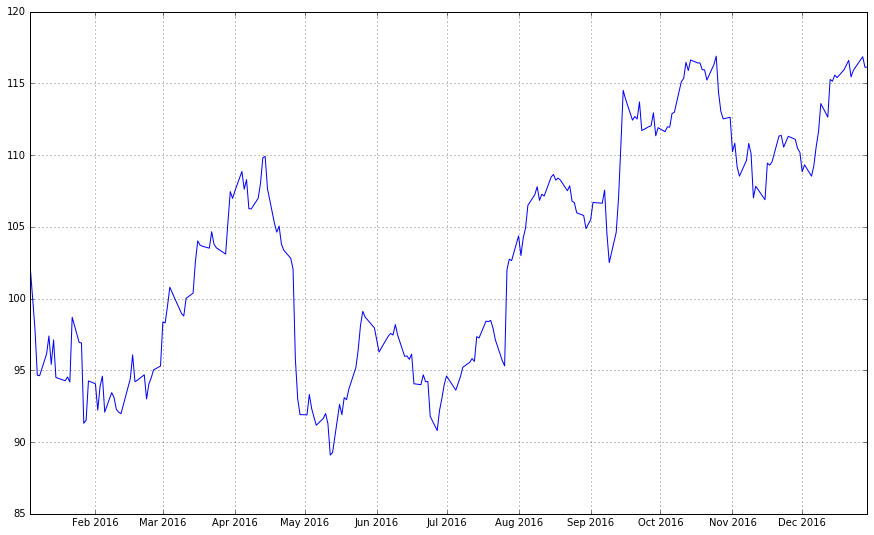

In [9]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
plt.grid(True)
#daily["close"].plot(grid = True) # Plot the adjusted closing price of AAPL

plt.plot(daily['date'], daily['close'])

In [11]:
daily.head()

,date,open,high,low,close
0,2016-01-04,100.0210,102.6220,99.8168,102.1300
1,2016-01-05,102.0840,102.1540,99.7876,100.0120
2,2016-01-06,98.3461,99.6902,97.4120,97.8785
3,2016-01-07,95.9694,97.4889,94.0896,94.6545
4,2016-01-08,95.2097,96.5120,94.2844,94.6253


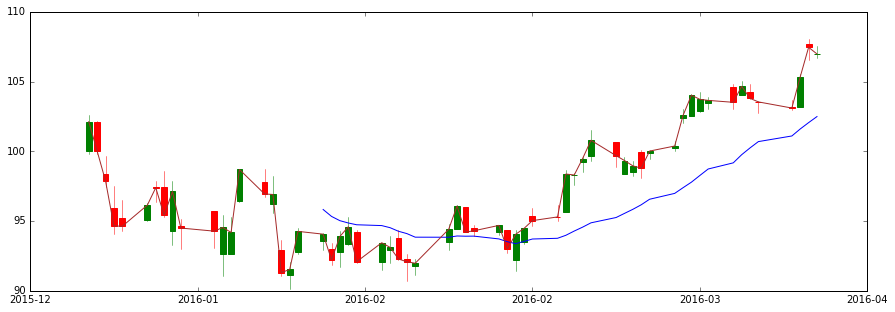

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.finance import candlestick_ohlc

import matplotlib.dates as mdates


df = daily.copy()

start = datetime.datetime.strptime("2016-01-01", '%Y-%m-%d').date()
finish = datetime.datetime.strptime("2016-04-01", '%Y-%m-%d').date()

df = df[(df['date'] > start) & (df['date'] < finish)]

# Converting date to pandas datetime format
df['date'] = pd.to_datetime(df['date'])
df["date"] = df["date"].apply(mdates.date2num)

ohlc= df[['date', 'open', 'high', 'low','close']].copy()

ohlc['SMA20'] = ohlc["close"].rolling(20).mean()
f1, ax = plt.subplots(figsize = (15,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.7, colorup='green', colordown='red')
#ax.plot(ohlc['date'], ohlc['SMA5'], color = 'green', label = 'SMA5')
ax.plot(ohlc['date'], ohlc['SMA20'], color = 'blue', label = 'SMA20')
ax.plot(ohlc['date'], ohlc['close'], color = "brown", label = 'close')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Saving image
#plt.savefig('OHLC.png')

plt.show()


In [23]:
import sqlite3

conn = sqlite3.connect("////media/ostapkharysh/SP_PHD_U3/database/NO_title.db")
c = conn.cursor()


sql = '''SELECT DATE, TONE  FROM news where date > 20160101000000 and date < 20160201000000'''
TONE = pd.DataFrame({"date": [], "tone": []})
for el in c.execute(sql):
    TONE = TONE.append({'date': el[0], 'tone': el[1].split(',')[0]}, ignore_index=True)

In [24]:
TONE.head()

,date,tone
0,20160101001500,-0.656814449917899
1,20160101001500,1.0183299389002
2,20160101001500,-5.27065527065527
3,20160101001500,-1.92982456140351
4,20160101001500,-2.93193717277487


In [53]:
for idx, el in enumerate(TONE.values):
    TONE.loc[idx]['tone'] = float(el[1])
    TONE.loc[idx]['date'] = datetime.datetime.strptime(el[0], '%Y%m%d%H%M%S')

In [52]:
TONE.head()

,date,tone
0,20160101001500,-0.656814
1,20160101001500,1.0183299389002
2,20160101001500,-5.27065527065527
3,20160101001500,-1.92982456140351
4,20160101001500,-2.93193717277487


### Tone visualization

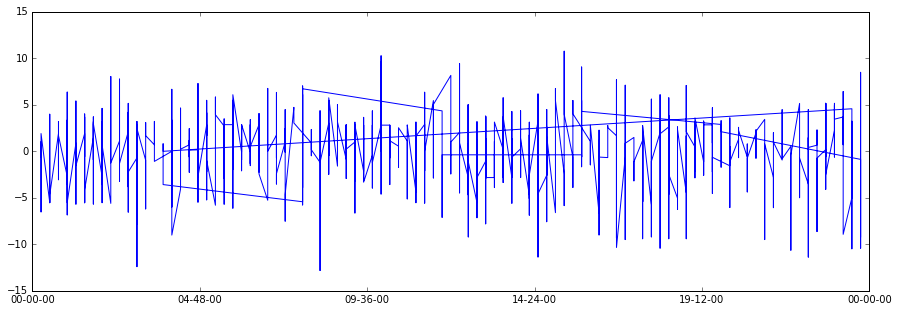

In [68]:

df_tone = TONE.copy()

start = datetime.datetime.strptime("2016-01-01", '%Y-%m-%d')
finish = datetime.datetime.strptime("2016-01-02", '%Y-%m-%d')

df_tone = df_tone[(df_tone['date'] >= start) & (df_tone['date'] < finish)]

# Converting date to pandas datetime format
df_tone['date'] = pd.to_datetime(df_tone['date'])
df_tone["date"] = df_tone["date"].apply(mdates.date2num)

f1, ax = plt.subplots(figsize = (15,5))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M-%S'))

ax.plot(df_tone['date'], df_tone['tone'], color = 'blue', label = 'tone')
